In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Clustering_Data.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
x = df.copy()
min_val = x.min()
max_val = x.max()
range_min, range_max = (0,1)
scaled_data = range_min + (x - min_val) * (range_max - range_min) / (max_val - min_val)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
def variance_calculate(X, centroids, labels):
    variance = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        variance += np.sum(np.linalg.norm(cluster_points - centroids[k], axis=1)**2)
    return variance



In [6]:
def k_means(X, k, max_iters=100, tolerance=1e-4):
    np.random.seed(42)
    X = np.array(X)  
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)] 
    for iteration in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
        
    return centroids, labels


In [7]:
variance = []
k = []
for i in range(1,10):
    centroids, labels = k_means(scaled_data, i)
    variance.append(variance_calculate(scaled_data, centroids, labels))
    k.append(i)

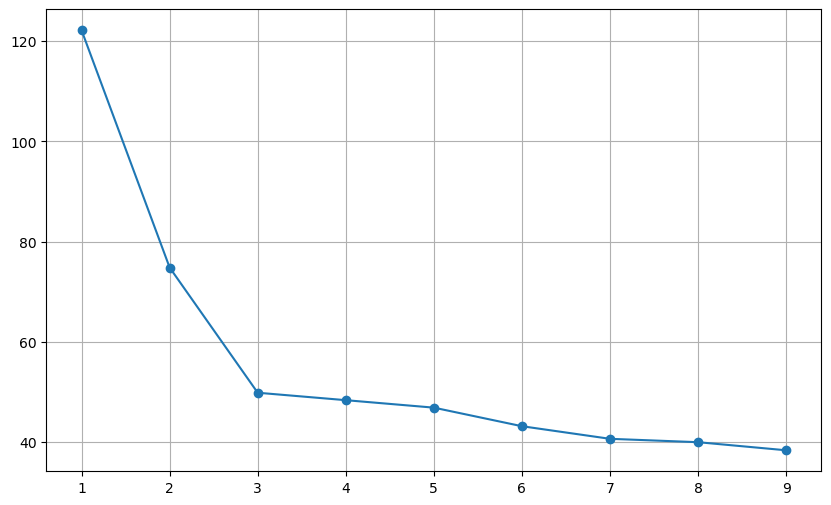

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k, variance, marker='o')
plt.grid(True)
plt.show()


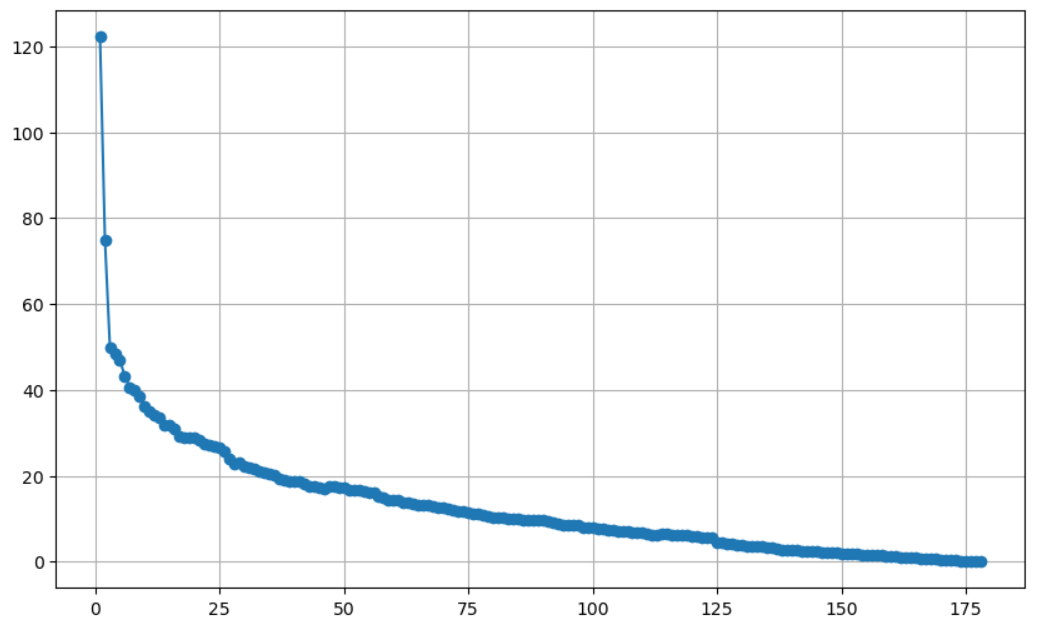

This graph has been plotted for all possible values of k as required by the dataset. We can see in this graph, the elbow point of the graph is at k = 3. For convenience of time, I have changed the range for k values to only 10, which is more than enough to observe the elbow bend in the graph.

In [11]:
final_centroids, final_labels = k_means(scaled_data, 3)

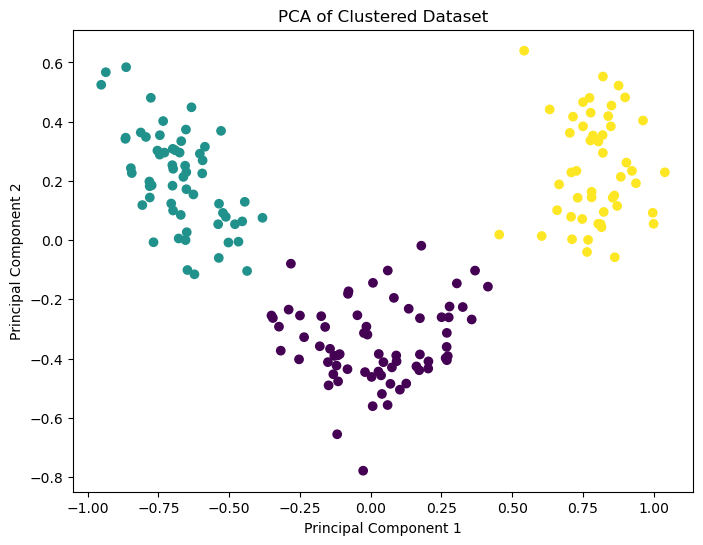

In [12]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels)
plt.title('PCA of Clustered Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()